# Trabajo Final Data Science - Grupo 4


# 1. Carga de Datos

In [1]:

import pandas  as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
csv_file = 'GBvideos_cc50_202101.csv'
GB_data = pd.read_csv(csv_file, sep=',')


GB_json = 'GB_category_id.json'
with open(GB_json, 'r') as file:
    data_categories = json.load(file)

# 2. Inspeccionar los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

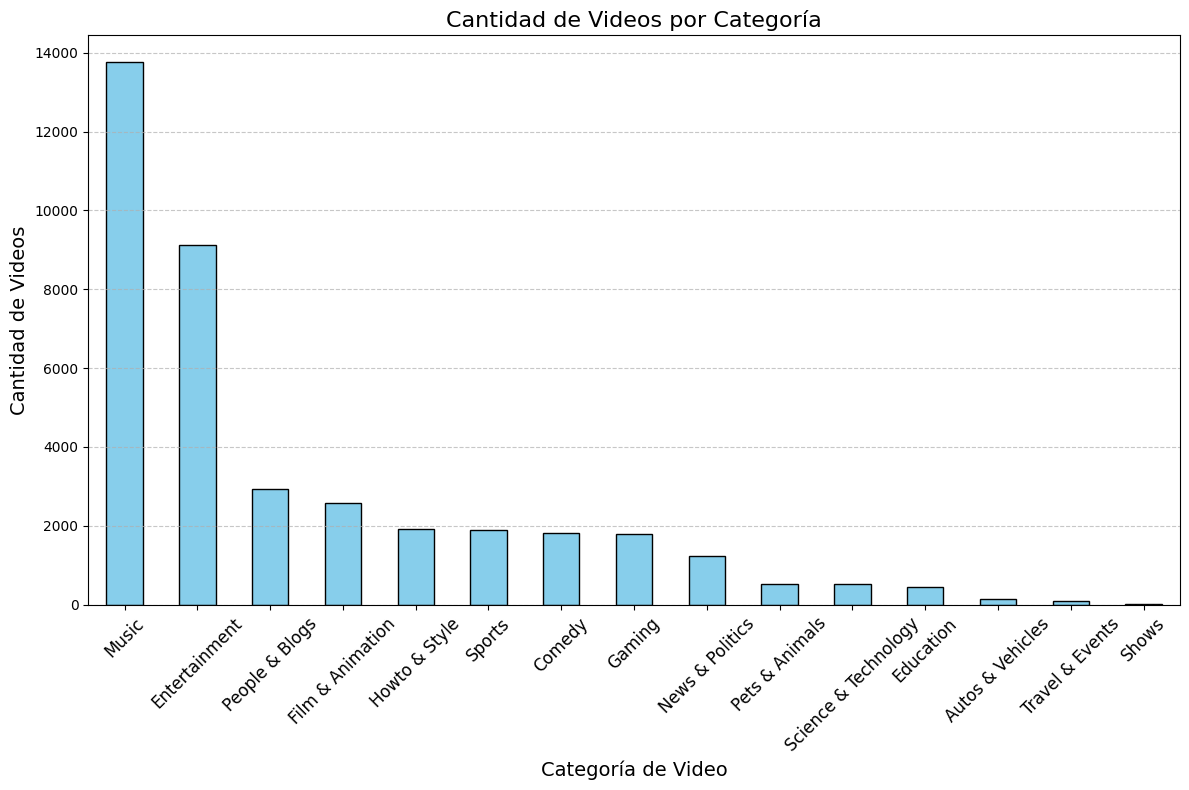

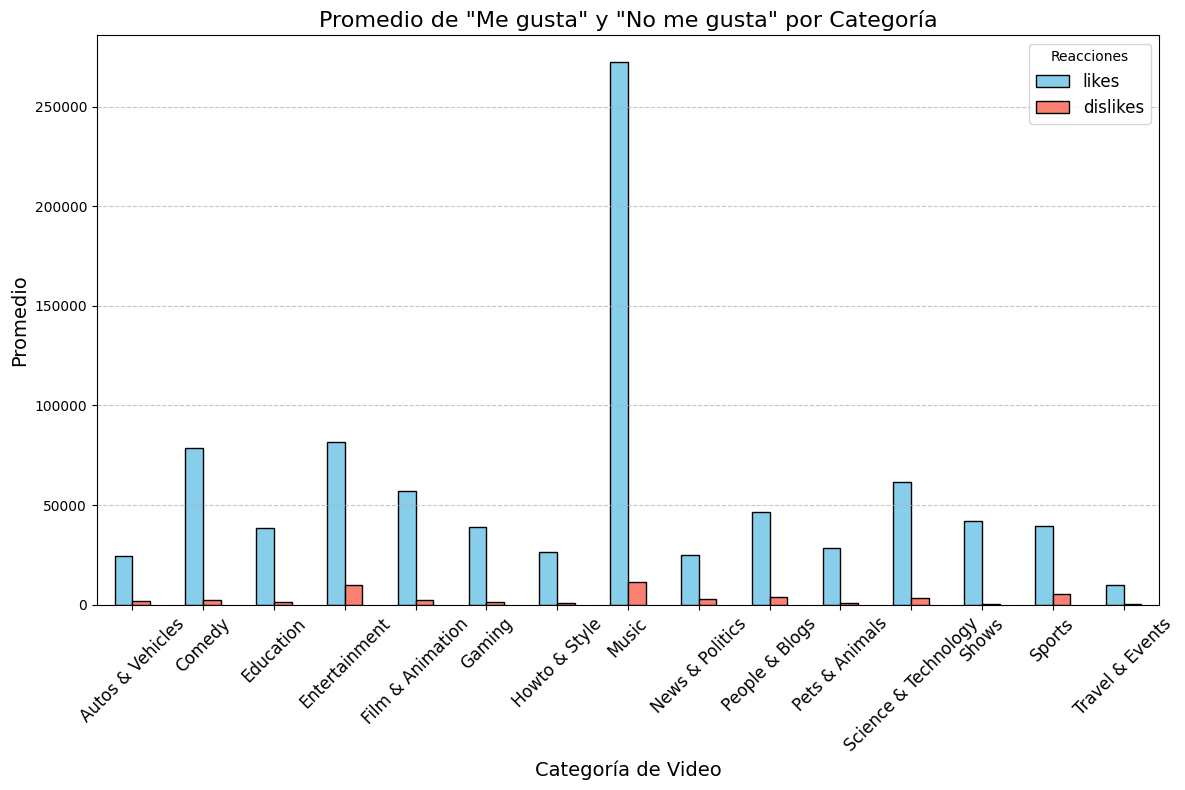

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\2990163955.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = GB_data.groupby('category_name').apply(lambda x: (x['likes'].sum() / x['dislikes'].sum()) if x['dislikes'].sum() > 0 else 0)


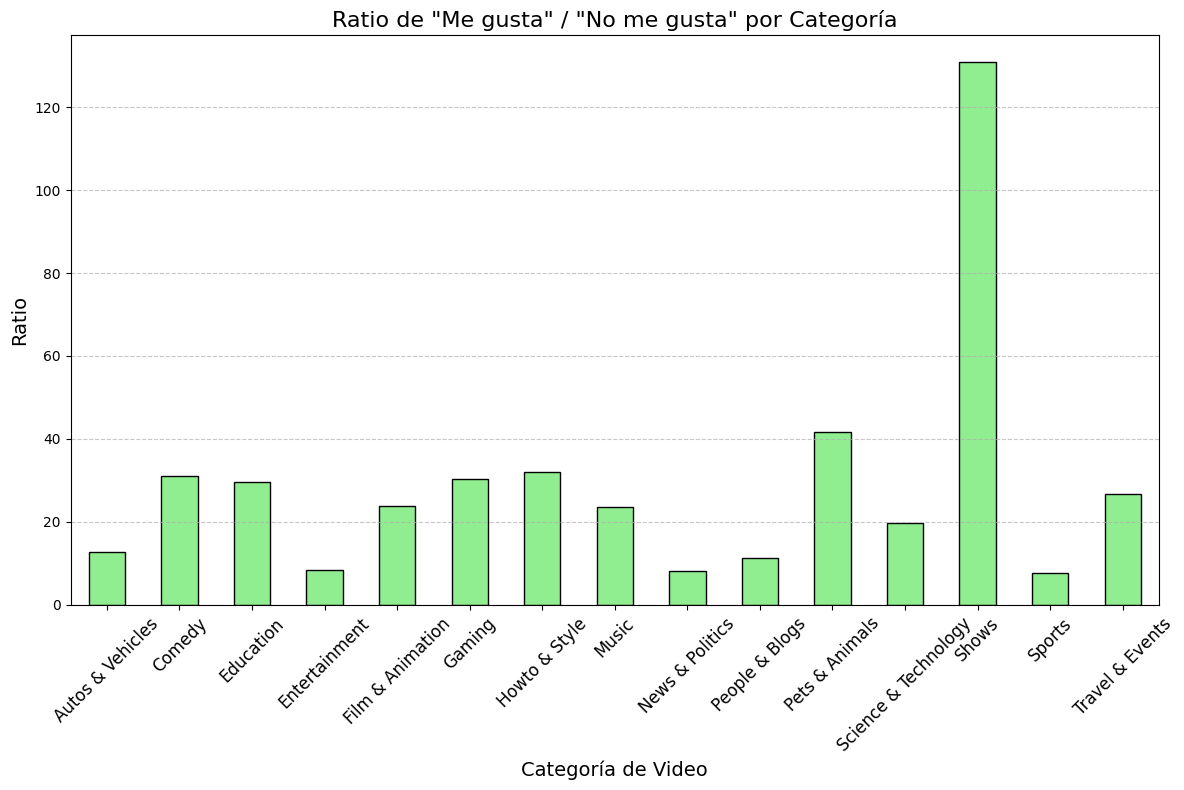

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\2990163955.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios_vistas_comentarios = GB_data.groupby('category_name').apply(lambda x: (x['views'].sum() / x['comment_count'].sum()) if x['comment_count'].sum() > 0 else 0)


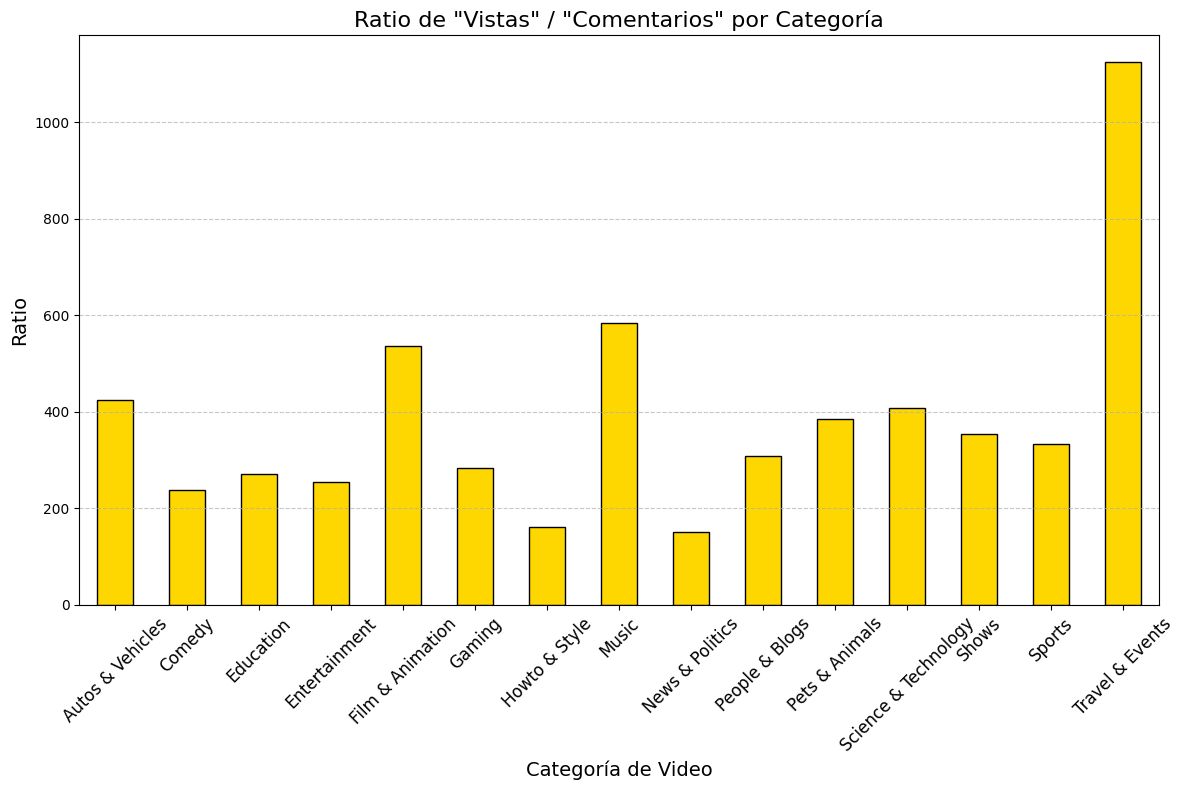

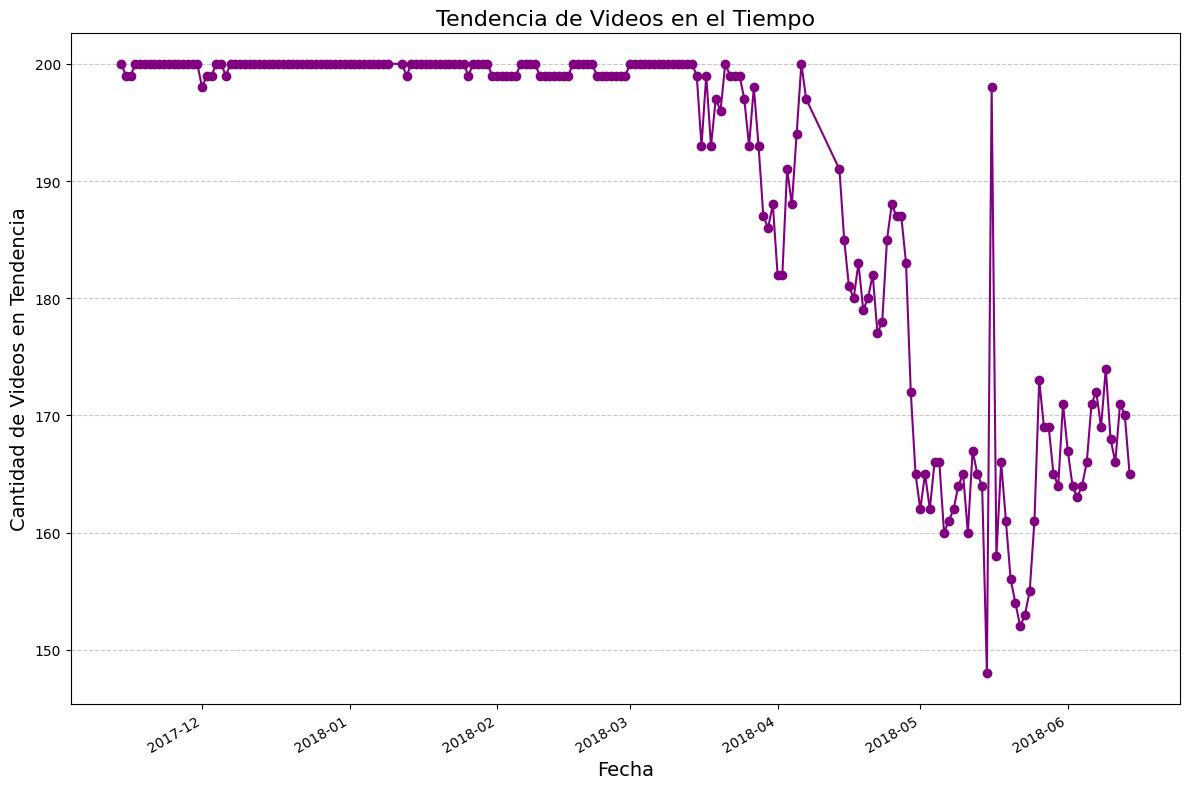

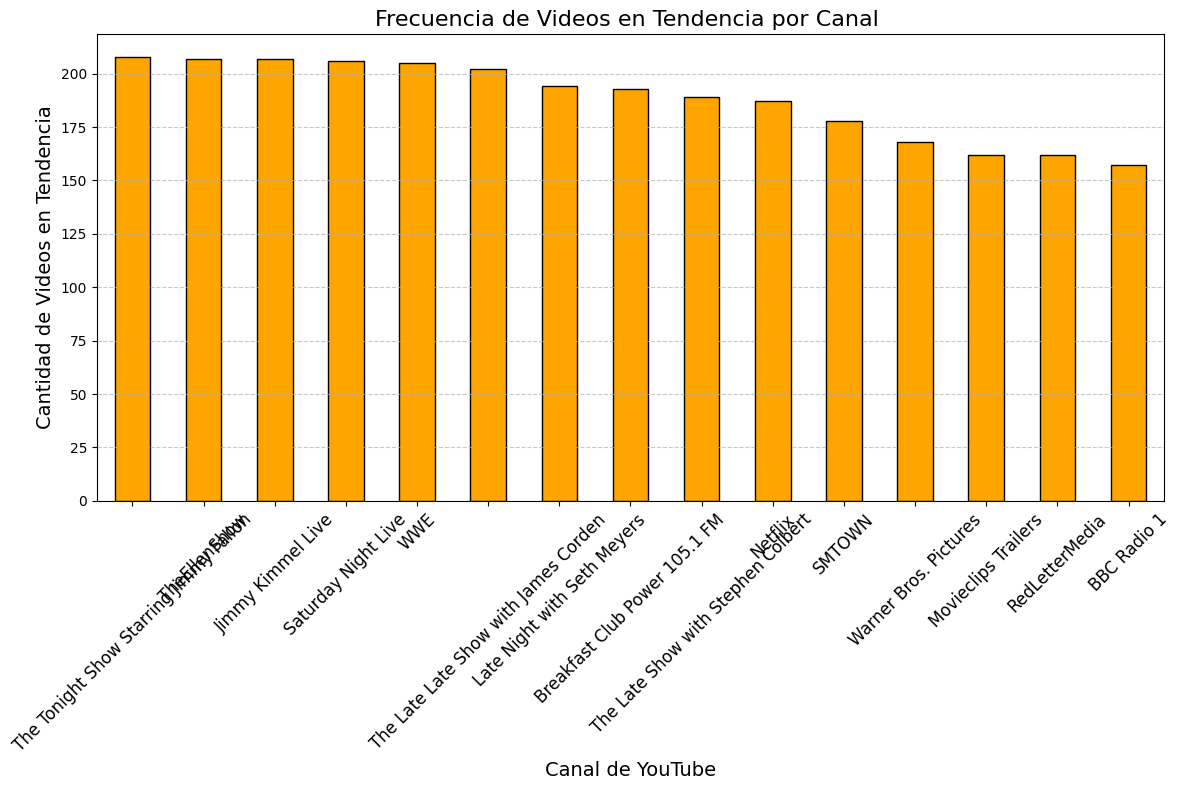

In [3]:
GB_data.info()

#GRAFICO DE CANTIDAD DE VIDEOS POR CATEGORÍA

category_mapping = {int(item['id']): item['snippet']['title'] for item in data_categories['items']}

GB_data['category_name'] = GB_data['category_id'].map(category_mapping)

category_counts = GB_data['category_name'].value_counts()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Videos por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Cantidad de Videos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#GRAFICO DE PROMEDIO DE LIKES Y DISLIKES POR CATEGORÍA
promedios = GB_data.groupby('category_name')[['likes', 'dislikes']].mean()
promedios.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Promedio de "Me gusta" y "No me gusta" por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Reacciones', fontsize=12)


plt.tight_layout()
plt.show()


# GRAFICO DE RATIO DE POCERNTAJE DE LIKE Y DISLIKE POR CATEGORIA
ratios = GB_data.groupby('category_name').apply(lambda x: (x['likes'].sum() / x['dislikes'].sum()) if x['dislikes'].sum() > 0 else 0)


ratios.plot(kind='bar', figsize=(12, 8), color='lightgreen', edgecolor='black')
plt.title('Ratio de "Me gusta" / "No me gusta" por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# GRAFICO DE RATIO DE VISTAS Y COMENTARIOS POR CATEGORÍA
ratios_vistas_comentarios = GB_data.groupby('category_name').apply(lambda x: (x['views'].sum() / x['comment_count'].sum()) if x['comment_count'].sum() > 0 else 0)

ratios_vistas_comentarios.plot(kind='bar', figsize=(12, 8), color='gold', edgecolor='black')
plt.title('Ratio de "Vistas" / "Comentarios" por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# GRAFICO DE TENDENCIA DE VIDEOS EN EL TIEMPO
GB_data['trending_date'] = pd.to_datetime(GB_data['trending_date'], format='%y.%d.%m')
tendencia_tiempo = GB_data.groupby('trending_date').size()
tendencia_tiempo.plot(kind='line', figsize=(12, 8), color='purple', marker='o', linestyle='-')

plt.title('Tendencia de Videos en el Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Videos en Tendencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# GRAFICO DE FRECUENCIA DE VIDEOS EN TENDENCIA POR CANAL
canales_frecuencia = GB_data['channel_title'].value_counts().head(15)

canales_frecuencia.plot(kind='bar', figsize=(12, 8), color='orange', edgecolor='black')
plt.title('Frecuencia de Videos en Tendencia por Canal ', fontsize=16)
plt.xlabel('Canal de YouTube', fontsize=14)
plt.ylabel('Cantidad de Videos en Tendencia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()







# 3. Visualizar los datos

In [4]:
GB_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_name
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,...,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics


# 4. Verificar la calidad de los datos

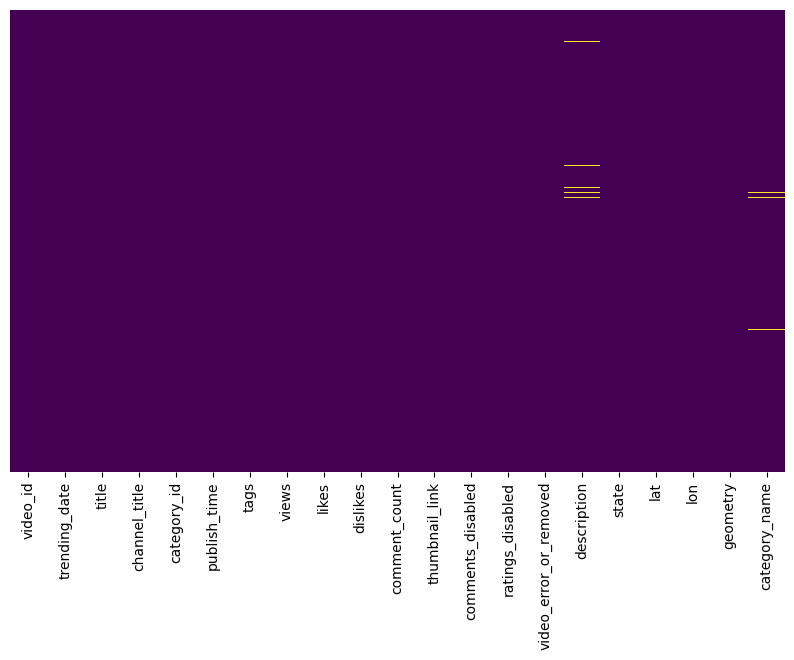

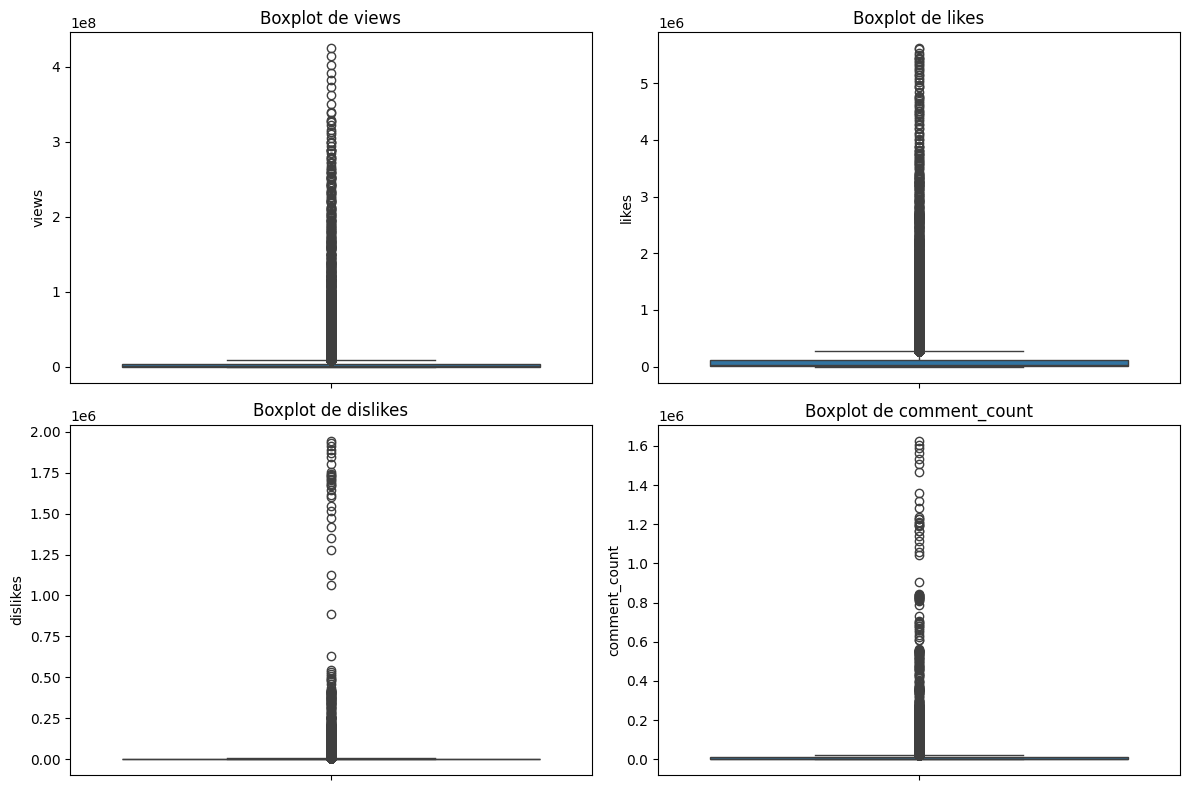

views
Media:
5911943.62663172
Cantidad de datos:
38916
Cantidad de valores atípicos:
5308
Porcentaje de datos dentro de valores normales: 
86.36036591633261 %
likes
Media:
134519.55349984582
Cantidad de datos:
38916
Cantidad de valores atípicos:
4696
Porcentaje de datos dentro de valores normales: 
87.9329838626786 %
dislikes
Media:
7612.559975331483
Cantidad de datos:
38916
Cantidad de valores atípicos:
5639
Porcentaje de datos dentro de valores normales: 
85.50981601397882 %
comment_count
Media:
13088.353145235893
Cantidad de datos:
38916
Cantidad de valores atípicos:
4915
Porcentaje de datos dentro de valores normales: 
87.37023332305478 %


In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(GB_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()



plt.figure(figsize=(12, 8))
for i, columna in enumerate(['views', 'likes', 'dislikes', 'comment_count'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=GB_data[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()


numericos = ['views', 'likes', 'dislikes', 'comment_count']
outlier_summary = {}

for columna in numericos:
    print(columna)
    print("Media:")
    print(GB_data[columna].mean())
    Q1 = GB_data[columna].quantile(0.25)
    Q3 = GB_data[columna].quantile(0.75)
    IQR = Q3 - Q1
    print("Cantidad de datos:")
    print(GB_data[columna].count())
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = GB_data[(GB_data[columna] < lower_bound) | (GB_data[columna] > upper_bound)][columna]
    print("Cantidad de valores atípicos:")
    outlier_summary[columna] = {
        print(outliers.count())
    }

    x = GB_data[columna].count()
    y = outliers.count()
    porcentaje = (x-y)/x
    print("Porcentaje de datos dentro de valores normales: ")
    print(porcentaje*100,"%")




# 5. Preparacion de los datos

# Limpiar los datos

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\1458219267.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  GB_data['category_name'].fillna(moda_category_name, inplace=True)


0


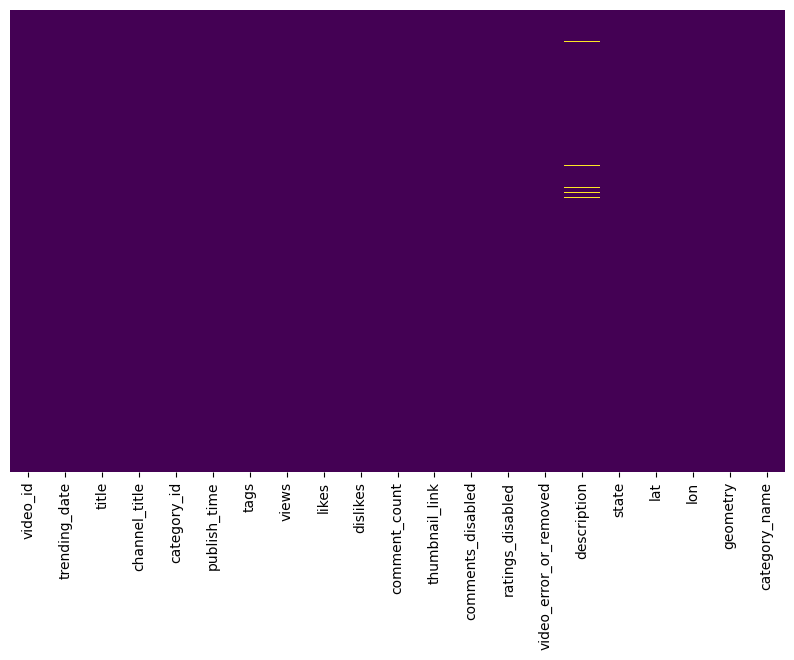

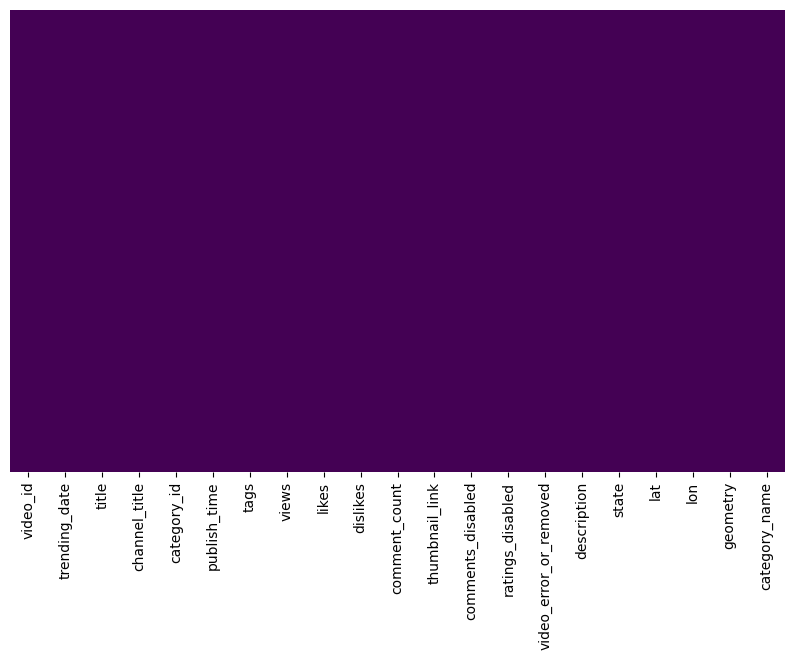

In [6]:
# Eliminar duplicados
GB_data.drop_duplicates(inplace=True)

moda_category_name = GB_data['category_name'].mode()[0]

GB_data['category_name'].fillna(moda_category_name, inplace=True)

print(GB_data['category_name'].isna().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(GB_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


# Manejar valores nulos de descripción, no son utiles para análisis
GB_data.fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(GB_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#YA NO QUEDAN VALORES FALTANTES


# Pre-procesar los datos

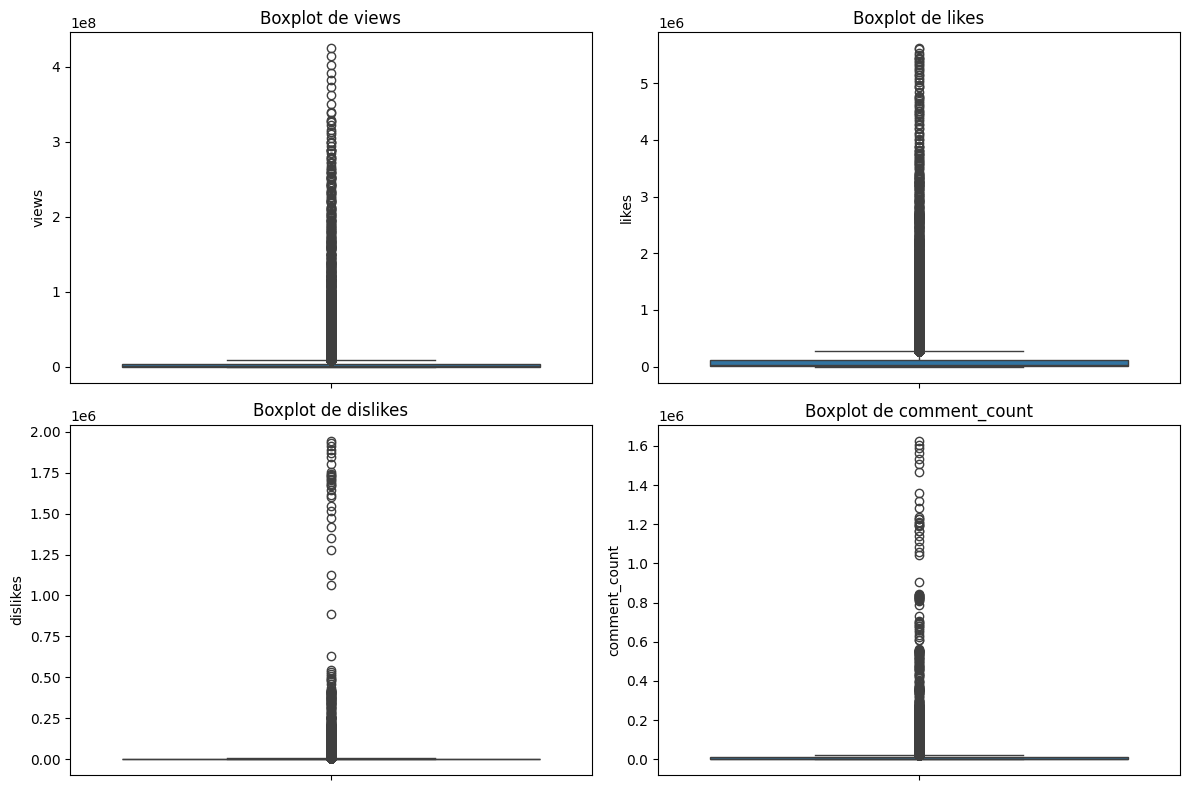

views
Media:
5911943.62663172
Cantidad de datos:
38916
Cantidad de valores atípicos:
5308
Porcentaje de datos dentro de valores normales: 
86.36036591633261 %
likes
Media:
134519.55349984582
Cantidad de datos:
38916
Cantidad de valores atípicos:
4696
Porcentaje de datos dentro de valores normales: 
87.9329838626786 %
dislikes
Media:
7612.559975331483
Cantidad de datos:
38916
Cantidad de valores atípicos:
5639
Porcentaje de datos dentro de valores normales: 
85.50981601397882 %
comment_count
Media:
13088.353145235893
Cantidad de datos:
38916
Cantidad de valores atípicos:
4915
Porcentaje de datos dentro de valores normales: 
87.37023332305478 %
Reemplazo completado en 5 iteraciones.
views
Media:
725903.9902353787
Cantidad de datos:
38916
Cantidad de valores atípicos:
0
Porcentaje de datos dentro de valores normales: 
100.0 %
likes
Media:
18168.047743858566
Cantidad de datos:
38916
Cantidad de valores atípicos:
0
Porcentaje de datos dentro de valores normales: 
100.0 %
dislikes
Media:
601

In [7]:
# Número de datos ausentes por variable
GB_data.isna().sum().sort_values()

plt.figure(figsize=(12, 8))
for i, columna in enumerate(['views', 'likes', 'dislikes', 'comment_count'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=GB_data[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

#VER VALORES ATÍPICOS:

numericos = ['views', 'likes', 'dislikes', 'comment_count']
outlier_summary = {}

for columna in numericos:
    print(columna)
    print("Media:")
    print(GB_data[columna].mean())
    Q1 = GB_data[columna].quantile(0.25)
    Q3 = GB_data[columna].quantile(0.75)
    IQR = Q3 - Q1
    print("Cantidad de datos:")
    print(GB_data[columna].count())
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = GB_data[(GB_data[columna] < lower_bound) | (GB_data[columna] > upper_bound)][columna]
    print("Cantidad de valores atípicos:")
    outlier_summary[columna] = {
        print(outliers.count())
    }

    x = GB_data[columna].count()
    y = outliers.count()
    porcentaje = (x-y)/x
    print("Porcentaje de datos dentro de valores normales: ")
    print(porcentaje*100,"%")


#REEPLAZAR VALORES ATÍPICOS CON LA MEDIANA:
numericos = ['views', 'likes', 'dislikes', 'comment_count']
max_iteraciones = 10
for iteracion in range(max_iteraciones):
    cambios = False
    for columna in numericos:
        Q1 = GB_data[columna].quantile(0.25)
        Q3 = GB_data[columna].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mediana = int(GB_data[columna].median())

        outliers_bajo = GB_data[columna] < lower_bound
        outliers_alto = GB_data[columna] > upper_bound

        if outliers_bajo.any() or outliers_alto.any():
            GB_data.loc[outliers_bajo, columna] = mediana
            GB_data.loc[outliers_alto, columna] = mediana
            cambios = True

    if not cambios:
        print(f"Reemplazo completado en {iteracion + 1} iteraciones.")
        break
else:
    print("Reemplazo completado en el número máximo de iteraciones.")


numericos = ['views', 'likes', 'dislikes', 'comment_count']
outlier_summary = {}

for columna in numericos:
    print(columna)
    print("Media:")
    print(GB_data[columna].mean())
    Q1 = GB_data[columna].quantile(0.25)
    Q3 = GB_data[columna].quantile(0.75)
    IQR = Q3 - Q1
    print("Cantidad de datos:")
    print(GB_data[columna].count())
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = GB_data[(GB_data[columna] < lower_bound) | (GB_data[columna] > upper_bound)][columna]
    print("Cantidad de valores atípicos:")
    outlier_summary[columna] = {
        print(outliers.count())
    }

    x = GB_data[columna].count()
    y = outliers.count()
    porcentaje = (x-y)/x
    print("Porcentaje de datos dentro de valores normales: ")
    print(porcentaje*100,"%")


# Construir nuevos datos


In [8]:
# SE CREA RATIO_LIKE
GB_data['ratio_like'] = GB_data.apply(lambda row: row['likes'] / (row['dislikes'] + 1) if row['dislikes'] > 0 else 0, axis=1)

# SE CREA VISITAS_RATIO
GB_data['visitas_ratio'] = GB_data.apply(lambda row: row['views'] / (row['comment_count'] + 1) if row['comment_count'] > 0 else 0, axis=1)
GB_data['positive_comments'] = GB_data['likes'] > GB_data['dislikes']

GB_data['trending'] = GB_data['trending_date'].notnull()
GB_data.to_csv('GBvideos_cc50_202101.csv', index=False)

GB_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                38916 non-null  object        
 1   trending_date           38916 non-null  datetime64[ns]
 2   title                   38916 non-null  object        
 3   channel_title           38916 non-null  object        
 4   category_id             38916 non-null  int64         
 5   publish_time            38916 non-null  object        
 6   tags                    38916 non-null  object        
 7   views                   38916 non-null  int64         
 8   likes                   38916 non-null  int64         
 9   dislikes                38916 non-null  int64         
 10  comment_count           38916 non-null  int64         
 11  thumbnail_link          38916 non-null  object        
 12  comments_disabled       38916 non-null  bool  

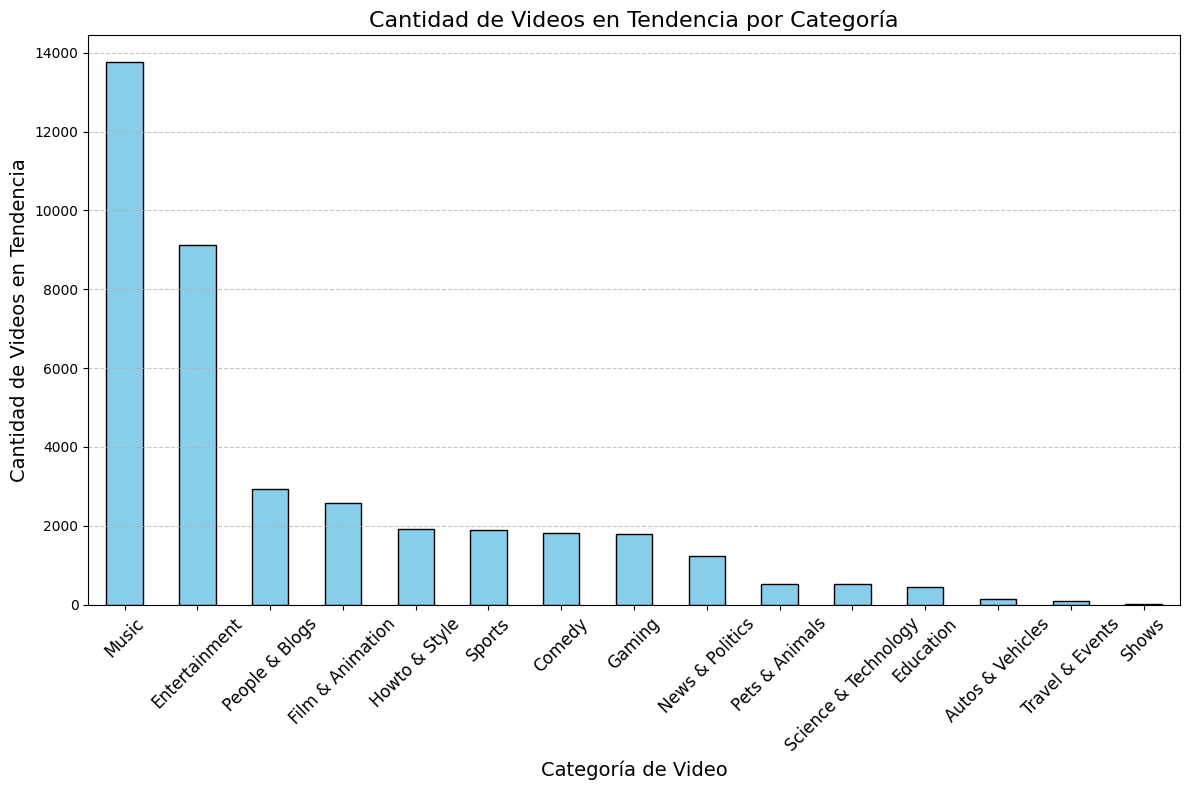

In [13]:
category_counts = GB_data['category_name'].value_counts()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Videos en Tendencia por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Cantidad de Videos en Tendencia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




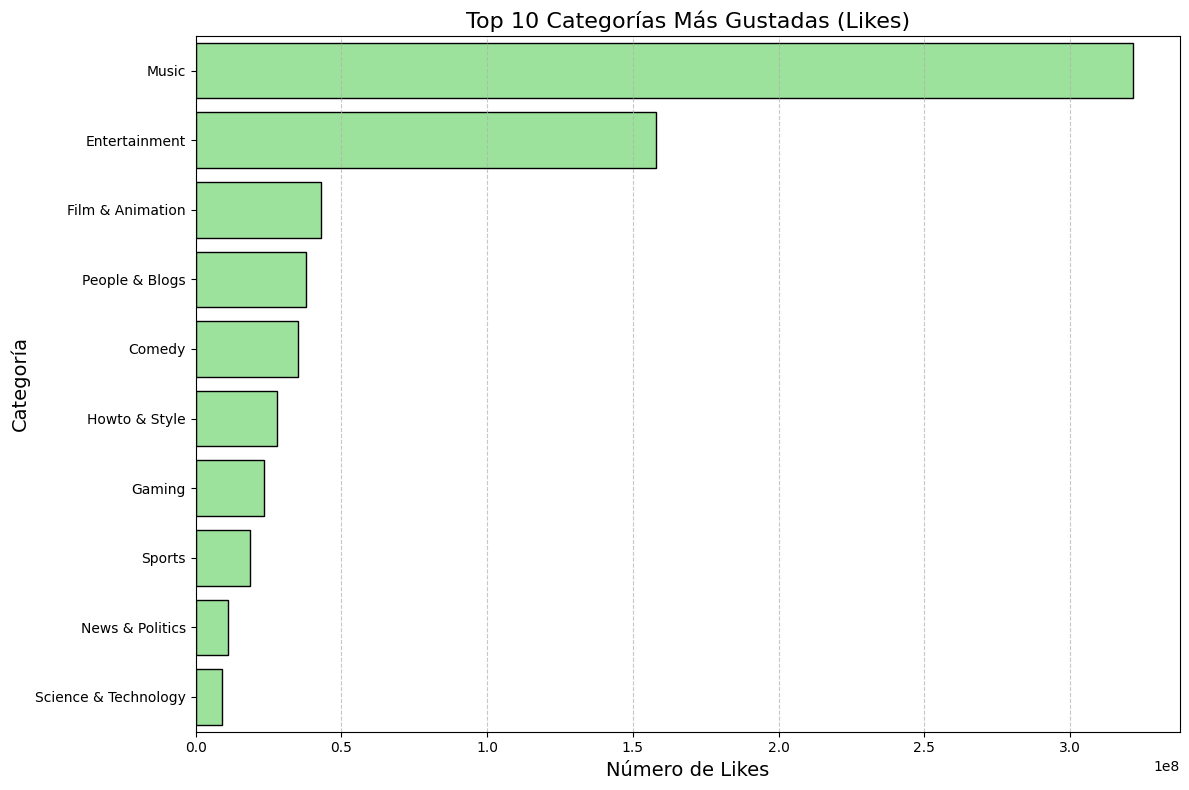

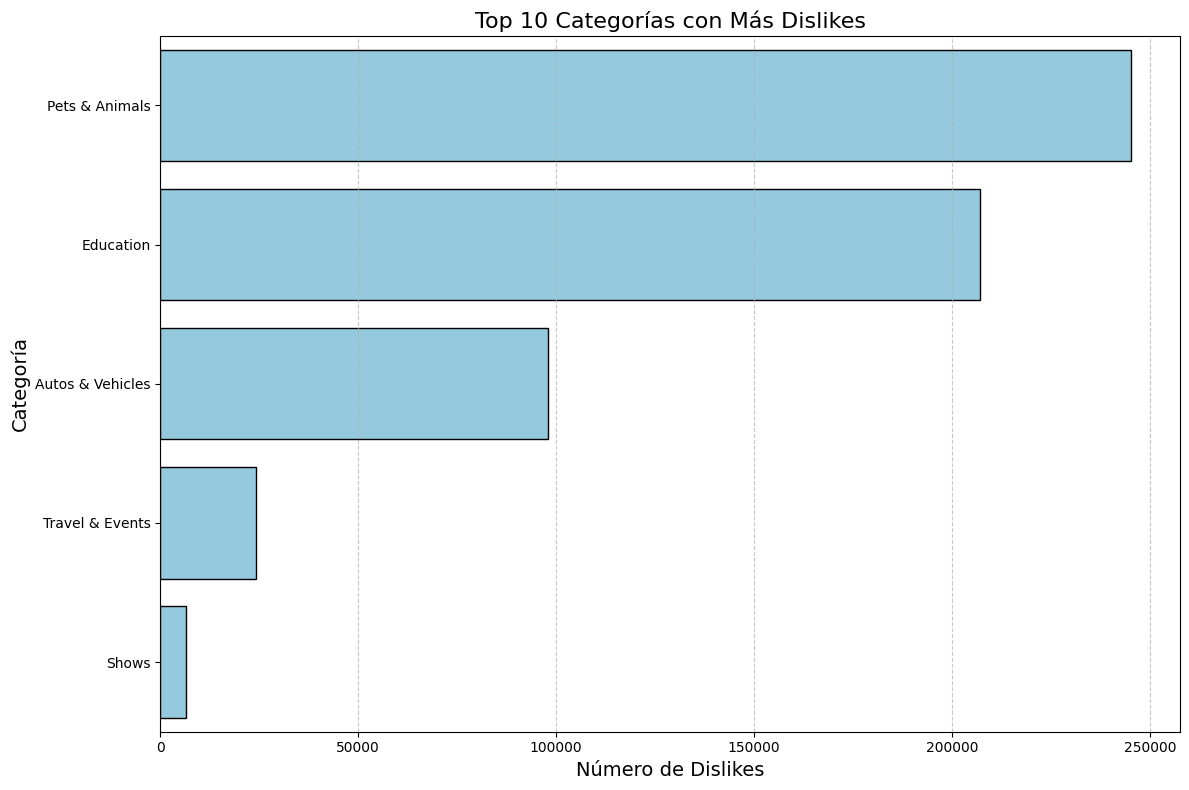

In [14]:
# Agrupar los datos por categoría y sumar los likes y dislikes
category_likes_dislikes = GB_data.groupby('category_name').agg({
    'likes': 'sum',
    'dislikes': 'sum',
    'views': 'sum'
}).reset_index()

# Ordenar los datos por likes (más gustadas)
category_likes_dislikes_sorted_by_likes = category_likes_dislikes.sort_values('likes', ascending=False)

# Ordenar los datos por dislikes (más rechazadas)
category_likes_dislikes_sorted_by_dislikes = category_likes_dislikes.sort_values('dislikes', ascending=False)

# Dividir en categorías más gustadas (top 10) - Sin que se repitan las categorías
top_10_categorias_gustadas = category_likes_dislikes_sorted_by_likes.head(10)

# Filtrar las categorías con más dislikes, excluyendo las ya seleccionadas como más gustadas
top_10_categorias_disgustadas = category_likes_dislikes_sorted_by_dislikes[~category_likes_dislikes_sorted_by_dislikes['category_name'].isin(top_10_categorias_gustadas['category_name'])].head(10)

# Gráfico para las categorías más gustadas (likes)
plt.figure(figsize=(12, 8))
sns.barplot(x='likes', y='category_name', data=top_10_categorias_gustadas, color='lightgreen', edgecolor='black')
plt.title('Top 10 Categorías Más Gustadas (Likes)', fontsize=16)
plt.xlabel('Número de Likes', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico para las categorías con más dislikes
plt.figure(figsize=(12, 8))
sns.barplot(x='dislikes', y='category_name', data=top_10_categorias_disgustadas, color='skyblue', edgecolor='black')
plt.title('Top 10 Categorías con Más Dislikes', fontsize=16)
plt.xlabel('Número de Dislikes', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\3049415557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_categories['ratio_like'] = valid_categories['likes'] / valid_categories['dislikes']
C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\3049415557.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_name', y='ratio_like', data=category_ratio, palette='viridis')


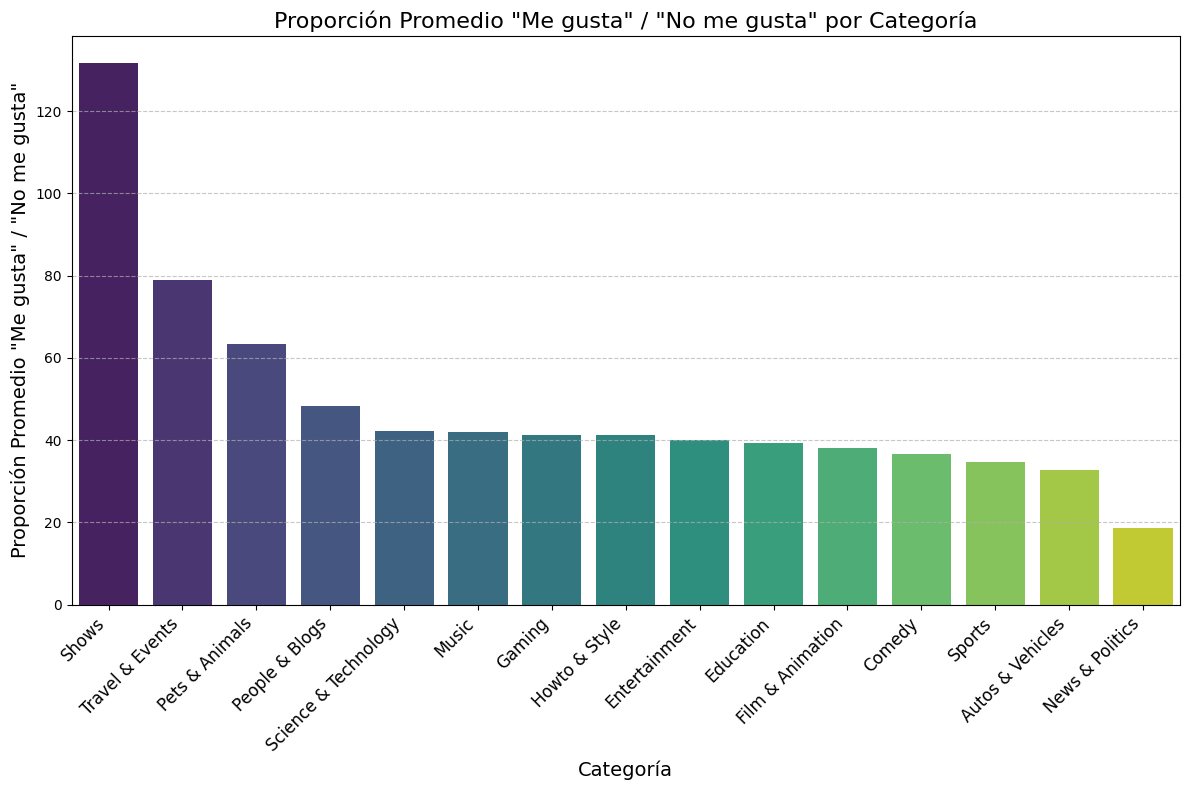

In [15]:
# Filtrar para asegurar que dislikes y likes sean mayores que 0
valid_categories = GB_data[(GB_data['likes'] > 0) & (GB_data['dislikes'] > 0)]

# Crear la columna de la proporción "Me gusta" / "No me gusta"
valid_categories['ratio_like'] = valid_categories['likes'] / valid_categories['dislikes']

# Agrupar por categoría y calcular la media de la proporción
category_ratio = valid_categories.groupby('category_name')['ratio_like'].mean().reset_index()

# Ordenar por la proporción "Me gusta" / "No me gusta" de mayor a menor
category_ratio = category_ratio.sort_values(by='ratio_like', ascending=False)

# Filtrar categorías con proporciones significativas (menos de 1000 para evitar ratios extremos)
category_ratio = category_ratio[category_ratio['ratio_like'] < 1000]

# Crear el gráfico de barras en formato vertical
plt.figure(figsize=(12, 8))
sns.barplot(x='category_name', y='ratio_like', data=category_ratio, palette='viridis')

# Añadir título y etiquetas
plt.title('Proporción Promedio "Me gusta" / "No me gusta" por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Proporción Promedio "Me gusta" / "No me gusta"', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\659999425.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_name', y='ratio_vistas_comentarios', data=category_ratio_vistas_comentarios, palette='viridis')


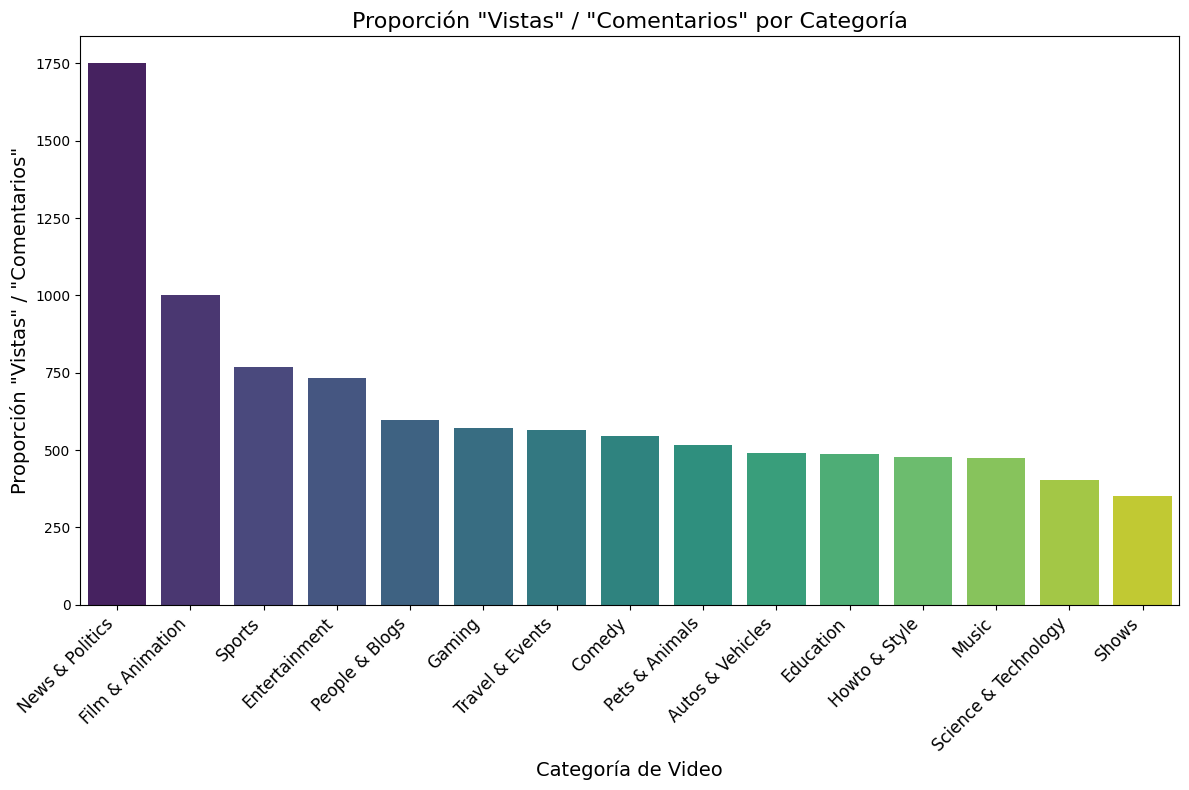

In [16]:
# Calcular el ratio de "Vistas" / "Comentarios"
GB_data['ratio_vistas_comentarios'] = GB_data.apply(
    lambda row: row['views'] / (row['comment_count'] + 1) if row['comment_count'] > 0 else 0, axis=1
)

# Agrupar por categoría y calcular el promedio de "Vistas" / "Comentarios"
category_ratio_vistas_comentarios = GB_data.groupby('category_name')['ratio_vistas_comentarios'].mean().reset_index()

# Ordenar las categorías por el ratio de "Vistas" / "Comentarios" de mayor a menor
category_ratio_vistas_comentarios = category_ratio_vistas_comentarios.sort_values(by='ratio_vistas_comentarios', ascending=False)

# Crear el gráfico de barras en vertical
plt.figure(figsize=(12, 8))
sns.barplot(x='category_name', y='ratio_vistas_comentarios', data=category_ratio_vistas_comentarios, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Proporción "Vistas" / "Comentarios" por Categoría', fontsize=16)
plt.xlabel('Categoría de Video', fontsize=14)
plt.ylabel('Proporción "Vistas" / "Comentarios"', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

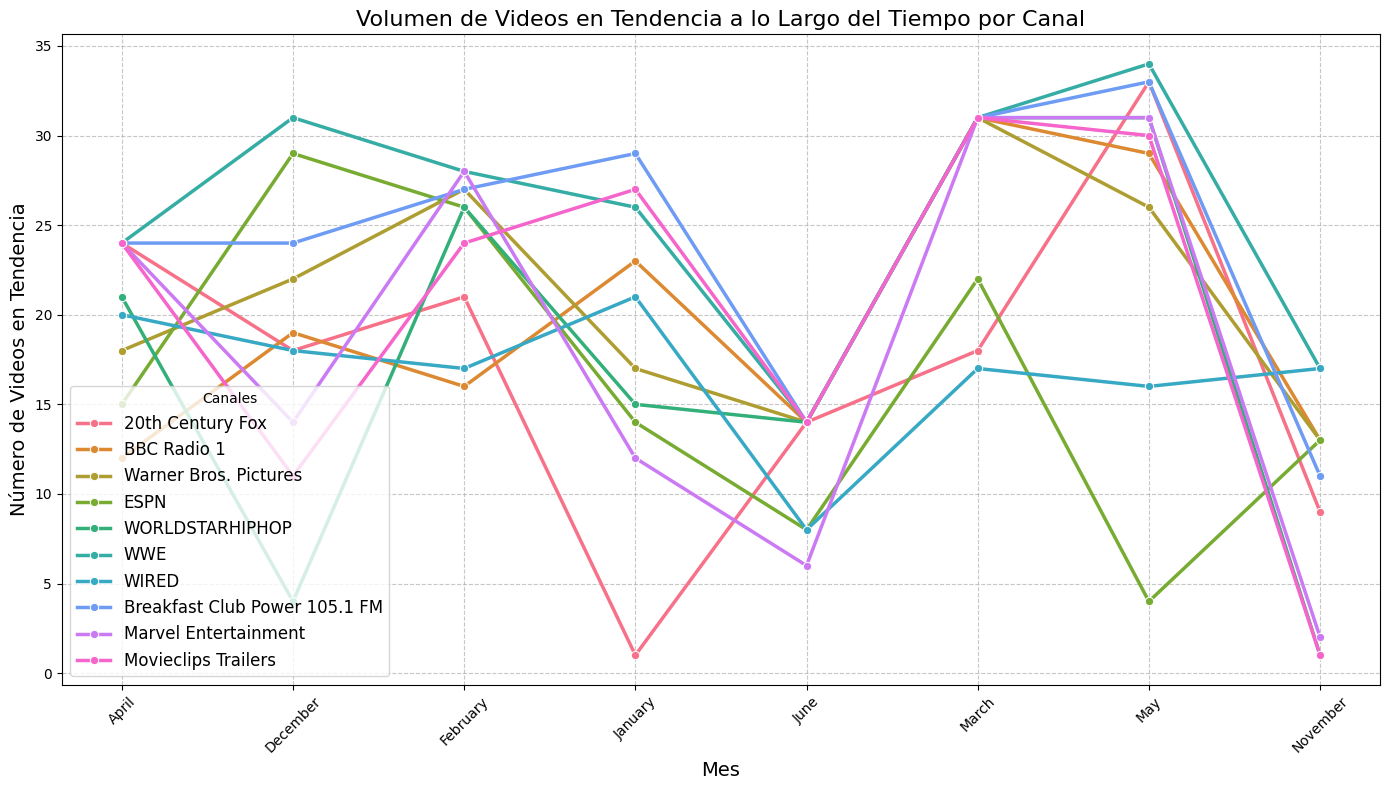

In [28]:
GB_data['month'] = pd.to_datetime(GB_data['trending_date']).dt.strftime('%B')

# Contar el número de videos en tendencia por canal y por mes
monthly_trending_videos_channel = (
    GB_data.groupby(['month', 'channel_title'])
    .size()
    .reset_index(name='num_trending_videos')
)

# Seleccionar los 10 canales más frecuentes (basados en el total de videos en tendencia)
top_channels = (
    monthly_trending_videos_channel['channel_title']
    .value_counts()
    .head(10)
    .index
)

# Filtrar los datos para incluir solo los 10 canales más frecuentes
filtered_data = monthly_trending_videos_channel[
    monthly_trending_videos_channel['channel_title'].isin(top_channels)
]

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Definir una paleta de colores para los canales
palette = sns.color_palette("husl", len(top_channels))

# Visualizar los resultados para los 10 canales más frecuentes en un solo gráfico
for channel, color in zip(top_channels, palette):
    datos_channel = filtered_data[filtered_data['channel_title'] == channel]
    sns.lineplot(
        x='month',
        y='num_trending_videos',
        data=datos_channel,
        marker='o',
        linewidth=2.5,
        color=color,
        label=channel
    )

# Personalización del gráfico
plt.title('Volumen de Videos en Tendencia a lo Largo del Tiempo por Canal', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Videos en Tendencia', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Canales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Los 10 canales más frecuentes en tendencia:
channel_title
The Tonight Show Starring Jimmy Fallon    208
TheEllenShow                              207
Jimmy Kimmel Live                         207
Saturday Night Live                       206
WWE                                       205
The Late Late Show with James Corden      202
Late Night with Seth Meyers               194
Breakfast Club Power 105.1 FM             193
The Late Show with Stephen Colbert        189
Netflix                                   187
Name: count, dtype: int64

Los 10 canales menos frecuentes en tendencia:
channel_title
TimWestwoodTV       1
Matt Steffanina     1
CG Record           1
5-Minute Crafts     1
The Chainsmokers    1
ETC Show            1
ASAP Ferg           1
Mr. Interesante     1
zander              1
MrRevillz           1
Name: count, dtype: int64


C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\4005570070.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='Blues_d')


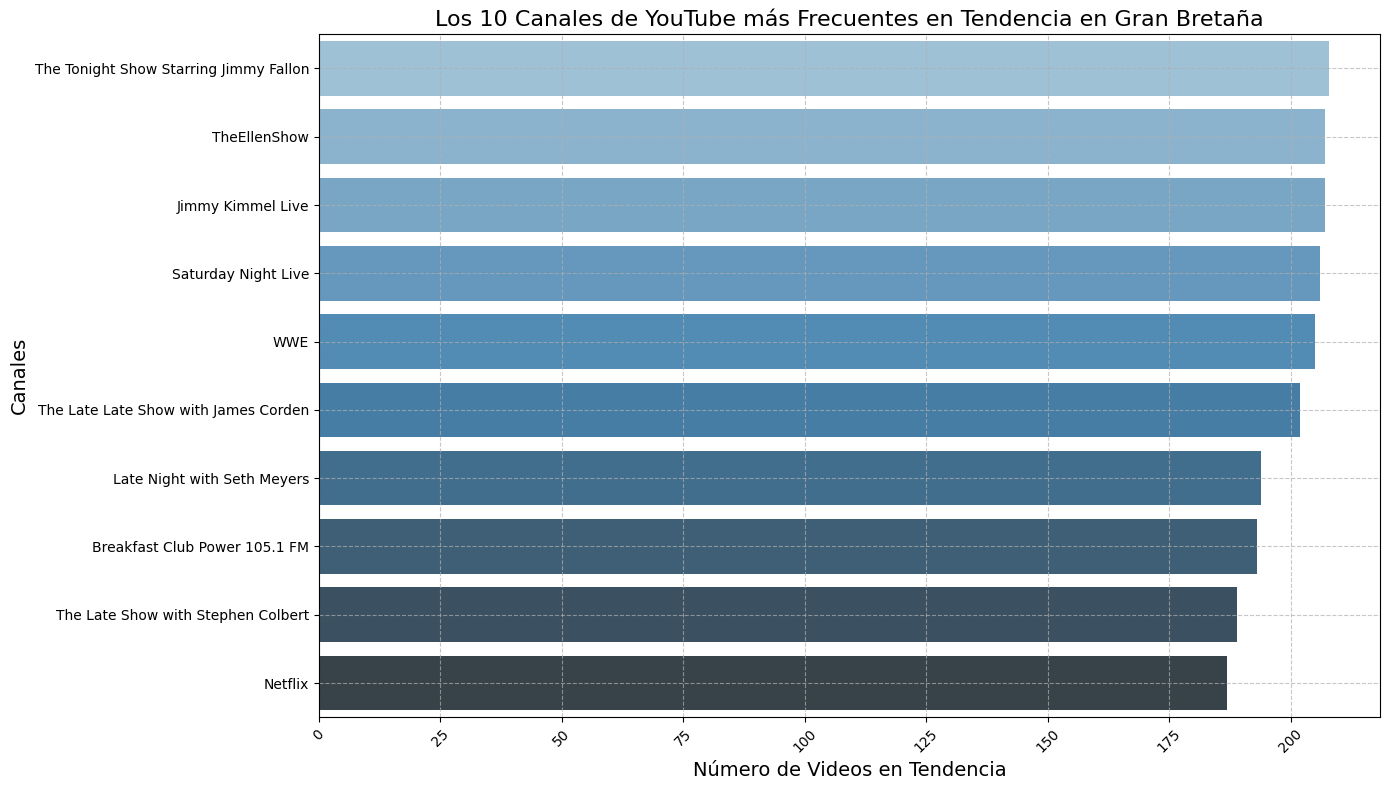

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\4005570070.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_channels.values, y=bottom_channels.index, palette='Reds_d')


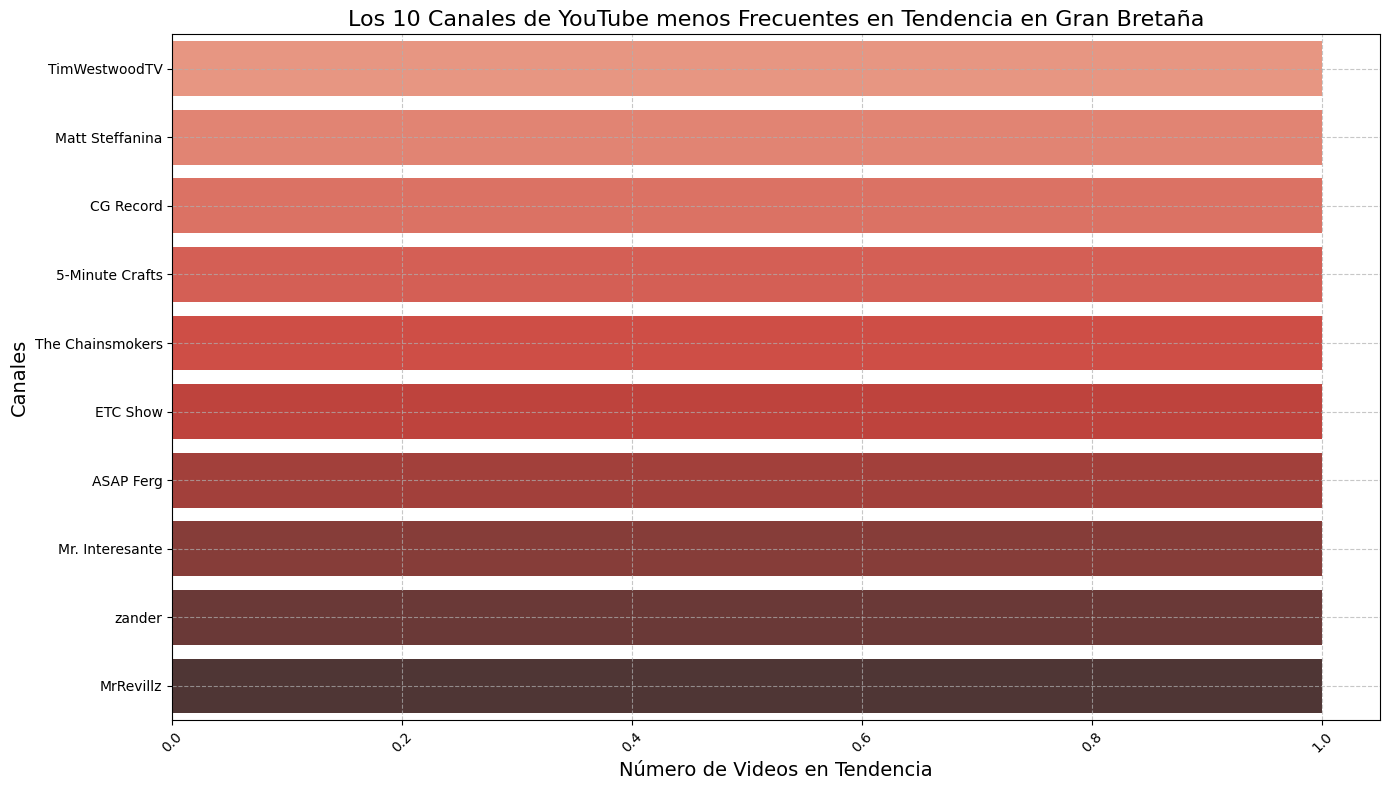

In [26]:
# Asegurémonos de que no haya valores nulos en 'channel_title' antes de contar las frecuencias
GB_data_clean = GB_data.dropna(subset=['channel_title'])

# Contar la cantidad de veces que cada canal está en tendencia
channel_counts = GB_data_clean['channel_title'].value_counts()

# Obtener los 10 canales más frecuentes (mayor a menor)
top_channels = channel_counts.head(10)

# Obtener los 10 canales menos frecuentes (menor a mayor)
bottom_channels = channel_counts.tail(10)

# Mostrar los resultados
print("Los 10 canales más frecuentes en tendencia:")
print(top_channels)

print("\nLos 10 canales menos frecuentes en tendencia:")
print(bottom_channels)

# Crear un gráfico para visualizar los canales más y menos frecuentes
plt.figure(figsize=(14, 8))

# Visualizar los 10 canales más frecuentes
sns.barplot(x=top_channels.values, y=top_channels.index, palette='Blues_d')
plt.title('Los 10 Canales de YouTube más Frecuentes en Tendencia en Gran Bretaña', fontsize=16)
plt.xlabel('Número de Videos en Tendencia', fontsize=14)
plt.ylabel('Canales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Crear otro gráfico para visualizar los 10 canales menos frecuentes
plt.figure(figsize=(14, 8))

sns.barplot(x=bottom_channels.values, y=bottom_channels.index, palette='Reds_d')
plt.title('Los 10 Canales de YouTube menos Frecuentes en Tendencia en Gran Bretaña', fontsize=16)
plt.xlabel('Número de Videos en Tendencia', fontsize=14)
plt.ylabel('Canales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Top Estados por Número de Vistas:
state
Cornwall                 610433577
Dumfries And Galloway    603449631
Aberdeen                 602117062
South Yorkshire          597634701
Cumbria                  595006629
Norfolk                  594391252
Luton                    592694365
Southampton              585875707
Highland                 580599292
Suffolk                  580370181
Name: views, dtype: int64

Top Estados por Número de Me Gustas:
state
Cornwall           15197452
Norfolk            15038229
Aberdeen           14961822
South Yorkshire    14875809
Cumbria            14858727
Luton              14777115
Westminster        14725092
Edinburgh          14630215
Highland           14610244
York               14532246
Name: likes, dtype: int64

Top Estados por Número de No Me Gustas:
state
Aberdeen                 503044
South Yorkshire          501070
Norfolk                  496067
Peterborough             494663
Cornwall                 493847
Dumfries And Galloway    49

C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\2076587430.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_views.index, y=top_states_views.values, palette='Blues_d')
C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\2076587430.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_likes.index, y=top_states_likes.values, palette='Greens_d')
C:\Users\Lucero\AppData\Local\Temp\ipykernel_26240\2076587430.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_dislikes.index, y=top_states_dislikes.values

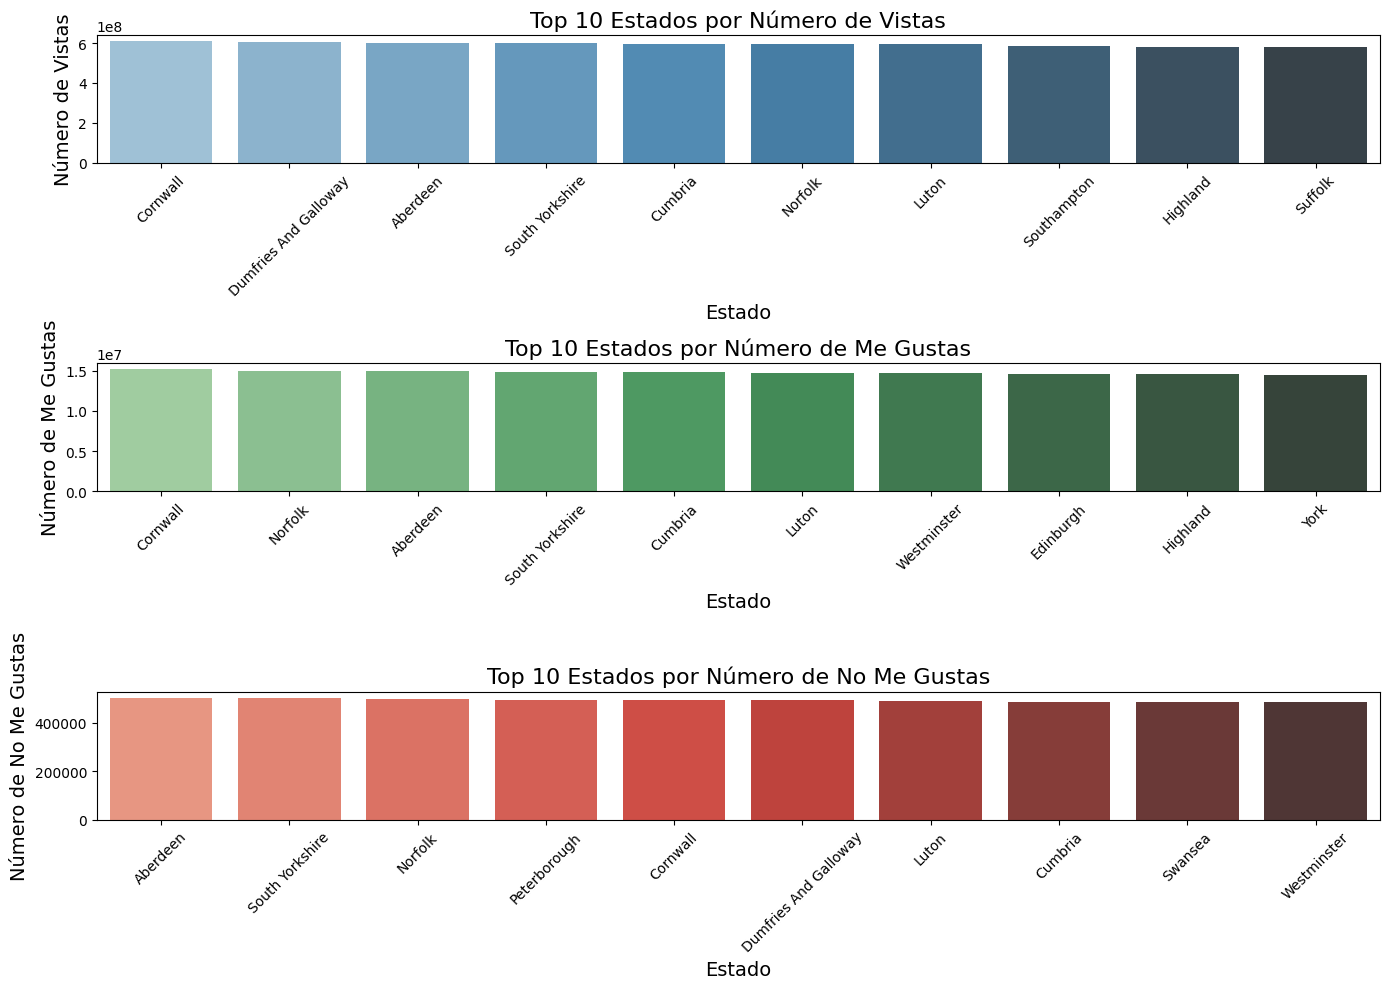

In [27]:
# Primero asegurémonos de que no haya valores nulos en 'state' o las columnas relacionadas con vistas, me gusta y no me gusta
GB_data_clean = GB_data.dropna(subset=['state', 'views', 'likes', 'dislikes'])

# Agrupar los datos por 'state' (si tienes esa columna)
state_metrics = GB_data_clean.groupby('state')[['views', 'likes', 'dislikes']].sum()

# Obtener los 10 estados con más vistas
top_states_views = state_metrics['views'].sort_values(ascending=False).head(10)

# Obtener los 10 estados con más me gusta
top_states_likes = state_metrics['likes'].sort_values(ascending=False).head(10)

# Obtener los 10 estados con más no me gusta
top_states_dislikes = state_metrics['dislikes'].sort_values(ascending=False).head(10)

# Mostrar los resultados en consola
print("Top Estados por Número de Vistas:")
print(top_states_views)

print("\nTop Estados por Número de Me Gustas:")
print(top_states_likes)

print("\nTop Estados por Número de No Me Gustas:")
print(top_states_dislikes)

# Graficar los resultados
plt.figure(figsize=(14, 10))

# Gráfico de los 10 estados con más vistas
plt.subplot(3, 1, 1)
sns.barplot(x=top_states_views.index, y=top_states_views.values, palette='Blues_d')
plt.title('Top 10 Estados por Número de Vistas', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Vistas', fontsize=14)
plt.xticks(rotation=45)

# Gráfico de los 10 estados con más me gusta
plt.subplot(3, 1, 2)
sns.barplot(x=top_states_likes.index, y=top_states_likes.values, palette='Greens_d')
plt.title('Top 10 Estados por Número de Me Gustas', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Me Gustas', fontsize=14)
plt.xticks(rotation=45)

# Gráfico de los 10 estados con más no me gusta
plt.subplot(3, 1, 3)
sns.barplot(x=top_states_dislikes.index, y=top_states_dislikes.values, palette='Reds_d')
plt.title('Top 10 Estados por Número de No Me Gustas', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de No Me Gustas', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# MODELIZAR Y EVALUAR RESULTADOS

# ESCOGER TECNICA DE MODELADO

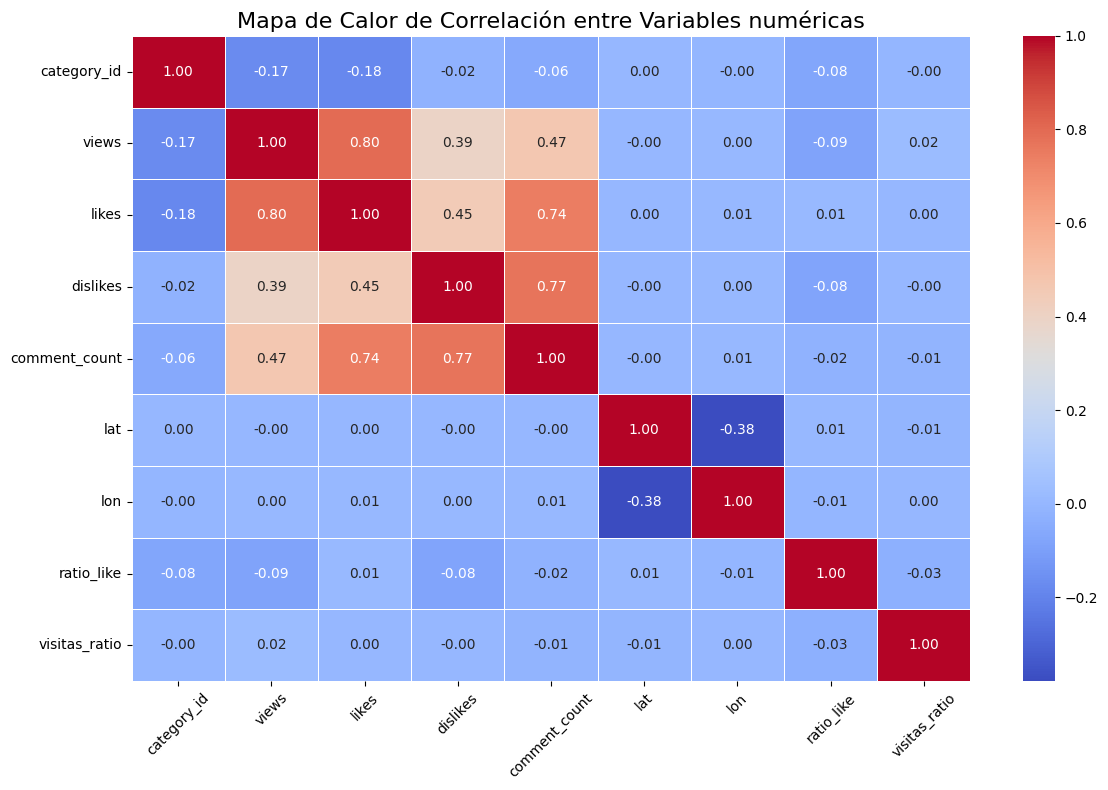

In [ ]:
# PRIMERO VEMOS EL MAPA DE CALOR PARA LAS VARIABLES.
correlation_matrix = GB_data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Mapa de Calor de Correlación entre Variables numéricas', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#AHORA QUE SABEMOS LA RELACIÓN ENTRE LAS VARIABLES, SABEMOS QUE EL NUMERO DE COMENTARIOS POSITIVOS DEPENDE DE LOS LIKES, DISLIKES, NUMERO COMENTARIOS Y LAS VISTAS, ESCOGEREMOS EL MODELO DE REGRESIÓN


# GENERAR PLAN DE PRUEBA

In [ ]:
#AGARRAMOS LAS VARIABLES X E Y.
X = GB_data[['views', 'likes', 'dislikes', 'comment_count']]
y = GB_data['positive_comments']
# DIVIDIMOS EL TEST_SIZE DEL DE ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CONSTRUIR MODELO


In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# EVALUAMOS EL MODELO
y_pred = log_model.predict(X_test)

# Métricas de evaluación
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

log_coef_df = pd.DataFrame(log_model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print(log_coef_df)

Matriz de Confusión:
[[ 153    0]
 [   0 7631]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       153
        True       1.00      1.00      1.00      7631

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

               Coeficiente
views            -0.000036
likes             1.835149
dislikes         -1.828872
comment_count    -0.003305


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# EVALUAR MODELO

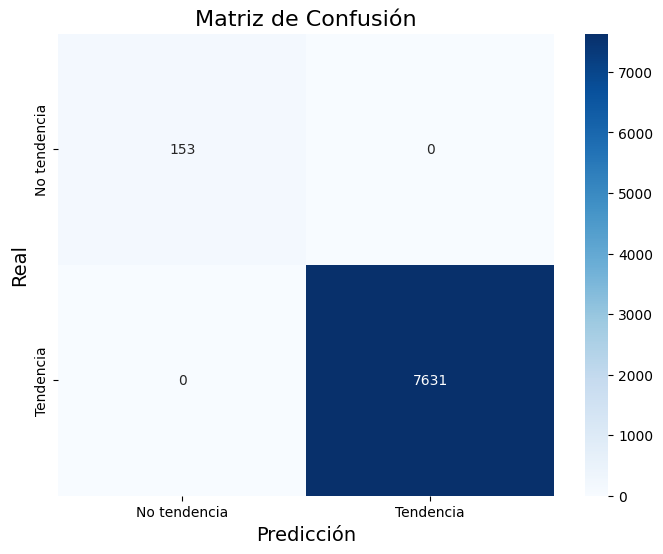

Precisión global del modelo: 100.00%


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No tendencia', 'Tendencia'], yticklabels=['No tendencia', 'Tendencia'])
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión global del modelo: {accuracy * 100:.2f}%")

#RECONSTRUIR MODELO


Matriz de Confusión:
[[ 153    0]
 [   0 7631]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       153
        True       1.00      1.00      1.00      7631

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

          Coeficiente
likes        2.668444
dislikes    -2.666209
Matriz de Confusión:
[[ 153    0]
 [   0 7631]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       153
        True       1.00      1.00      1.00      7631

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

          Coeficiente
likes        2.668444
dislikes    -2.666209


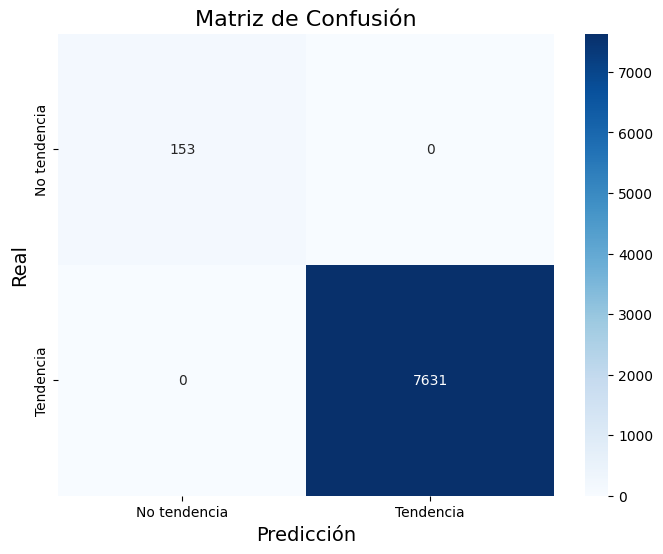

Precisión global del modelo: 100.00%


In [ ]:
#AGARRAMOS LAS VARIABLES X E Y.
X = GB_data[[ 'likes', 'dislikes']]
y = GB_data['positive_comments']
# DIVIDIMOS EL TEST_SIZE DEL DE ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# EVALUAMOS EL MODELO
y_pred = log_model.predict(X_test)


print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

log_coef_df = pd.DataFrame(log_model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print(log_coef_df)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# EVALUAMOS EL MODELO
y_pred = log_model.predict(X_test)


print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

log_coef_df = pd.DataFrame(log_model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print(log_coef_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No tendencia', 'Tendencia'], yticklabels=['No tendencia', 'Tendencia'])
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión global del modelo: {accuracy * 100:.2f}%")

#MODELO PARA VIEWS

Para este modelo elegimos un modelo de regresion lineal


# GENERAR PLAN DE PRUEBA

In [ ]:
X = GB_data[['likes','comment_count','dislikes']]
y = GB_data['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#CREAR MODELO

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


#EVALUAR EL MODELO

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
print(coef_df)

Mean Squared Error (MSE): 91802511246.693
Coeficiente de determinación (R²): 0.5944884671348529
        Variable  Coeficiente
0          likes    17.008217
1  comment_count    34.292824
2       dislikes   416.653713
